In [1]:
!pip install nibabel

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ mri_input           │ (None, 4, 32, 64, │          0 │ -                 │
│ (InputLayer)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 32, 64,    │          0 │ mri_input[0][0]   │
│                     │ 64, 4)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 32, 64,    │      3,488 │ permute[0][0]     │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_2     │ (None, 16, 32,    │          0 │ conv3d_2[0][0]    │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_3 (Conv3D)   │ (None, 16, 32,    │     55,360 │ max_pooling3d_2[… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_3     │ (None, 8, 16, 16, │          0 │ conv3d_3[0][0]    │
│ (MaxPooling3D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 131072)    │          0 │ max_pooling3d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gene_input          │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │ 16,777,344 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │     38,528 │ gene_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 256)       │          0 │ dense_4[0][0],    │
│ (Concatenate)       │                   │            │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │     16,448 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,891,233 (64.43 MB)

 Trainable params: 16,891,233 (64.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 48s 792ms/step - loss: 924233.1875 - mae: 520.7497 - val_loss: 30224.1211 - val_mae: 98.8847
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 752ms/step - loss: 109899.9766 - mae: 119.5549 - val_loss: 8476.7930 - val_mae: 33.1000
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 748ms/step - loss: 63897.3633 - mae: 82.9914 - val_loss: 1297.0918 - val_mae: 10.4967
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 737ms/step - loss: 25579.3828 - mae: 43.7725 - val_loss: 215.5497 - val_mae: 6.9746
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 741ms/step - loss: 3296.0505 - mae: 28.9047 - val_loss: 886.8385 - val_mae: 18.5298
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 749ms/step - loss: 9119.1699 - mae: 37.5158 - val_loss: 221.1030 - val_mae: 8.7166
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 751ms/step - loss: 662.3194 - mae: 12.4812 - val_loss: 43.7897 - val_mae: 4.5407
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 29s 776ms/step - loss: 580.3055 - mae: 14.8606 - val_loss: 57.2948 - val_

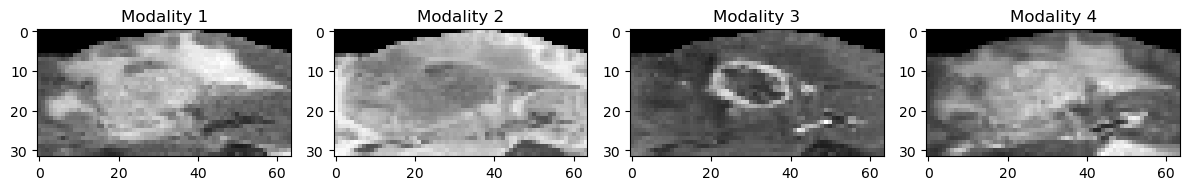

In [14]:
import tensorflow as tf
import os
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from scipy.ndimage import zoom

# --------- Step 1: Load Genetic Data ---------
genetic_df = pd.read_csv(r"C:\Users\jasmi\Downloads\genetic_data.csv")
genetic_df = genetic_df.iloc[:369]  # Limit to first 369 patients

def format_genetic_id(idx):
    return f"brats{int(idx):05d}"

genetic_df["id_clean"] = genetic_df["Patient_ID"].apply(lambda x: format_genetic_id(x.split('_')[-1]))
gene_cols = [col for col in genetic_df.columns if col.startswith("GF_")]
genetic_map = {
    row["id_clean"]: row[gene_cols].values.astype(np.float32)
    for _, row in genetic_df.iterrows()
}


# --------- Step 2: Load BraTS 2021 Data ---------
brats_path = r"C:\Users\jasmi\Downloads\archive (3)\training\MICCAI_BraTS2020_TrainingData"
patient_dirs = [d for d in os.listdir(brats_path) if d.startswith("BraTS")]

patient_data = []
for d in patient_dirs:
    pid = d
    id_clean = format_genetic_id(pid.split("_")[-1])
    if id_clean not in genetic_map:
        continue

    # Load segmentation mask
    seg_path = os.path.join(brats_path, pid, f"{pid}_seg.nii")
    seg = nib.load(seg_path).get_fdata()
    nonzero = np.nonzero(seg)

    if len(nonzero[0]) == 0:
        continue

    z_min, z_max = int(np.min(nonzero[0])), int(np.max(nonzero[0]))
    y_min, y_max = int(np.min(nonzero[1])), int(np.max(nonzero[1]))
    x_min, x_max = int(np.min(nonzero[2])), int(np.max(nonzero[2]))
    bbox = [x_min, x_max, y_min, y_max, z_min, z_max]

    patient_data.append({
        "id": pid,
        "id_clean": id_clean,
        "bbox": bbox,
    })

# --------- Step 3: Extract ROI ---------
def extract_roi(mri_paths, bbox, target_shape=(32, 64, 64)):
    modalities = [nib.load(p).get_fdata() for p in mri_paths]
    volume = np.stack(modalities, axis=0)
    x1, x2, y1, y2, z1, z2 = bbox
    roi = volume[:, z1:z2, y1:y2, x1:x2]

    zoom_factors = (
        1,
        target_shape[0] / roi.shape[1],
        target_shape[1] / roi.shape[2],
        target_shape[2] / roi.shape[3]
    )
    roi_resized = zoom(roi, zoom=zoom_factors, order=1)
    return roi_resized.astype(np.float32)

updated_patient_data = []
for p in patient_data:
    try:
        pid = p["id"]
        folder = os.path.join(brats_path, pid)
        bbox = p["bbox"]
        mri_paths = [
            os.path.join(folder, f"{pid}_flair.nii"),
            os.path.join(folder, f"{pid}_t1.nii"),
            os.path.join(folder, f"{pid}_t1ce.nii"),
            os.path.join(folder, f"{pid}_t2.nii")
        ]
        roi = extract_roi(mri_paths, bbox)
        updated = {
            "id": pid,
            "id_clean": p["id_clean"],
            "bbox": bbox,
            "roi": roi,
            "genes": genetic_map[p["id_clean"]],
            "label": np.random.rand(),  # Placeholder; replace with true label if available
        }
        updated_patient_data.append(updated)
    except Exception as e:
        continue

# --------- Step 4: Prepare Data ---------
X_mri = np.array([p["roi"] for p in updated_patient_data])
X_mri = X_mri[..., np.newaxis]
X_gene = np.array([p["genes"] for p in updated_patient_data])
y = np.array([p["label"] for p in updated_patient_data])

X_mri_train, X_mri_val, X_gene_train, X_gene_val, y_train, y_val = train_test_split(
    X_mri, X_gene, y, test_size=0.2, random_state=42
)


# --------- Step 5: Build Model ---------
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv3D, MaxPooling3D, Dropout, concatenate
from keras.optimizers import Adam

# MRI input (4 modalities stacked as channels)
mri_input = Input(shape=(4, 32, 64, 64), name="mri_input")

# We permute the dimensions to (32, 64, 64, 4) to treat modalities as channels
x = tf.keras.layers.Permute((2, 3, 4, 1))(mri_input)

x = Conv3D(32, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling3D(pool_size=2)(x)
x = Conv3D(64, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling3D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)

# Genetic data input
gene_input = Input(shape=(300,), name="gene_input")
g = Dense(128, activation='relu')(gene_input)

# Merge
combined = concatenate([x, g])
z = Dense(64, activation='relu')(combined)
z = Dropout(0.3)(z)
z = Dense(1, activation='linear')(z)

model = Model(inputs=[mri_input, gene_input], outputs=z)
model.compile(optimizer=Adam(1e-4), loss='mse', metrics=['mae'])
model.summary()


# --------- Step 6: Train ---------
history = model.fit(
    [X_mri_train, X_gene_train], y_train,
    validation_data=([X_mri_val, X_gene_val], y_val),
    epochs=25, batch_size=8
)

# --------- Step 7: Evaluate ---------
eval_result = model.evaluate([X_mri_val, X_gene_val], y_val)
print(f"\n✅ Evaluation (Loss, MAE): {eval_result}")

# --------- Optional: Visualize one sample ---------
plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(X_mri[0][i, :, :, 32], cmap='gray')
    plt.title(f"Modality {i+1}")
plt.tight_layout()
plt.show()


In [18]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# ---- Evaluate on validation data ----
y_pred = model.predict([X_mri_val, X_gene_val])

# Metrics
mae = np.mean(np.abs(y_val - y_pred))
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"✅ Evaluation Results:")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")

# ---- Save predictions to CSV ----
results_df = pd.DataFrame({
    "Actual": y_val.flatten(),
    "Predicted": y_pred.flatten()
})
results_df.to_csv("tumor_growth_predictions.csv", index=False)
print("📁 Predictions saved to 'tumor_growth_predictions.csv'")


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 541ms/step
✅ Evaluation Results:
MAE  = 3.3753
RMSE = 8.2992
📁 Predictions saved to 'tumor_growth_predictions.csv'


In [20]:
# Save the model in HDF5 format
model.save("tumor_growth_prediction_model.h5")
print("✅ Model saved as 'tumor_growth_prediction_model.h5'")


✅ Model saved as 'tumor_growth_prediction_model.h5'
